In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install koreanize-matplotlib
# import koreanize_matplotlib

# %config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [6]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
print(f'모집단의 평균 : {df["TotalPrice"].mean()}')
print(f'모집단의 표준편차 : {df["TotalPrice"].std()}')

모집단의 평균 : 17.98779487699964
모집단의 표준편차 : 378.8108235059747


In [7]:
sample_df = df.sample(n=1000, random_state=42)
print(f'표본의 평균 : {sample_df["TotalPrice"].mean()}')
print(f'표본의 표준편차 : {sample_df["TotalPrice"].std()}')

표본의 평균 : 16.832069999999998
표본의 표준편차 : 64.46732773087356


- 표본의 평균은 모집단의 평균과 매우 유사하지만, 약간의 차이가 있습니다. 이는 표본을 무작위로 추출했기 때문에 발생하는 자연스러운 변동이라고 생각합니다
- 표본의 표준편차는 모집단의 표준편차보다 훨씬 작습니다. 이는 표본의 크기가 모집단보다 훨씬 작기 때문에, 표본 내 데이터의 분포가 덜 분산된 경향이 있기 때문입니다
- 중심극한정리는 표본의 크기가 충분히 클 경우 표본 평균의 분포가 정규분포에 근사한다는 이론입니다
- 표본 평균(16.8321)은 모집단 평균(17.9878)에 가깝습니다
- 표본의 표준편차가 64.4673으로 나타났지만, 이는 개별 데이터의 분산을 반영한 값으로 생각됩니다
- 중심극한정리는 큰 표본 크기에서 표본 평균이 모집단 평균에 가까워 지는 것을 가리키며, 위 분석결과에서 관찰한 바와 일치합니다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [8]:
df["Country"] = df["Country"].astype(str)

top_two_countries = df['Country'].value_counts().head(2)
print(top_two_countries)

Country
United Kingdom    495478
Germany             9495
Name: count, dtype: int64


In [9]:
filtered_df = df[df['Country'].isin(['United Kingdom', 'Germany'])]
mean_total_price_per_country = filtered_df.groupby('Country')['TotalPrice'].mean()
mean_uk = mean_total_price_per_country['United Kingdom']
mean_germany = mean_total_price_per_country['Germany']

print(f"영국 평균 total price:{mean_uk}")
print(f'독일 평균 total price:{mean_germany}')

영국 평균 total price:16.525065419655363
독일 평균 total price:23.348942601369142


- 귀무가설: 두 국가간의 Total Price 평균에 차이가 없다
- 대립가설: 두 국가간의 Total Price 평균에 차이가 있다

In [10]:
from scipy.stats import ttest_ind

uk_prices = df[df['Country'] == 'United Kingdom']['TotalPrice'].dropna().values
germany_prices = df[df['Country'] == 'Germany']['TotalPrice'].dropna().values
t_stat, p_value = ttest_ind(uk_prices, germany_prices, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -10.046360185819829
P-value: 9.823416115791871e-24


In [11]:
alpha = 0.05
if p_value < alpha:
  print("두 국가간의 차이는 통계적으로 유의성이 있다.")
else:
  print("두 국가간의 차이는 통계적으로 유의성이 없다")

두 국가간의 차이는 통계적으로 유의성이 있다.


- t-통계량이 -10.046으로 매우 큰 음수 값을 가지므로, 두 국가 간 TotalPrice 평균에 큰 차이가 있음을 시사합니다
- p-값이 매우 작습니다. 이는 두 국가 간 TotalPrice 평균 차이가 우연에 의한 것이 아니라 통계적으로 유의미함을 나타냅니다
- 1종 오류는 실제로 두 국가 간 차이가 없는데, t-검정을 통해 차이가 있다고 잘못 결론 내리는 경우입니다. p-값이 매우 작기 때문에 1종 오류의 가능성은 매우 낮습니다
- 2종 오류는 실제로 두 국가 간 차이가 있음에도 불구하고, t-검정을 통해 차이가 없다고 잘못 결론 내리는 경우입니다. 현재 결과에서는 p-값이 매우 작아 2종 오류의 가능성이 거의 없다고 할 수 있습니다
- 결론은 귀무가설을 기각합니다

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

weekday_data = df[df['DayOfWeek'] <= 4]
weekend_data = df[df['DayOfWeek'] > 4]

In [13]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중


In [14]:
plt.figure(figsize=(14, 12))

<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

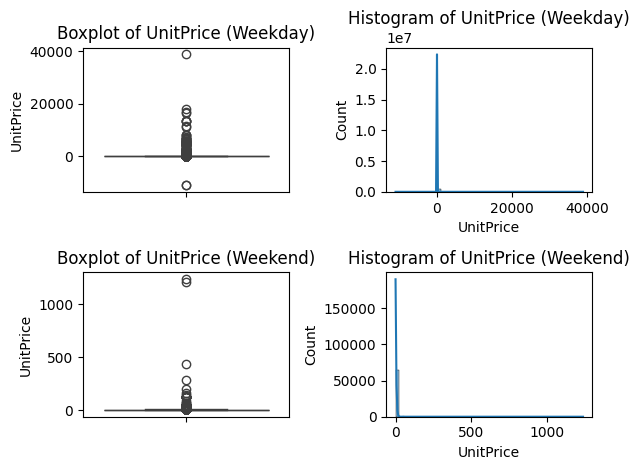

In [15]:
# 주중
plt.subplot(2, 2, 1)
sns.boxplot(y=weekday_data['UnitPrice'])
plt.title('Boxplot of UnitPrice (Weekday)')

plt.subplot(2, 2, 2)
sns.histplot(weekday_data['UnitPrice'], bins=50, kde=True)
plt.title('Histogram of UnitPrice (Weekday)')

# 주말
plt.subplot(2, 2, 3)
sns.boxplot(y=weekend_data['UnitPrice'])
plt.title('Boxplot of UnitPrice (Weekend)')

plt.subplot(2, 2, 4)
sns.histplot(weekend_data['UnitPrice'], bins=50, kde=True)
plt.title('Histogram of UnitPrice (Weekend)')

plt.tight_layout()
plt.show()

In [16]:
weekday_stats = df[df['WeekEnd'] == '주중']['UnitPrice'].agg(['mean', 'median', 'std', 'var'])
weekday_stats['25%'] = df[df['WeekEnd'] == '주중']['UnitPrice'].quantile(0.25)
weekday_stats['75%'] = df[df['WeekEnd'] == '주중']['UnitPrice'].quantile(0.75)
weekday_stats.name = 'Weekday'

weekend_stats = df[df['WeekEnd'] == '주말']['UnitPrice'].agg(['mean', 'median', 'std', 'var'])
weekend_stats['25%'] = df[df['WeekEnd'] == '주말']['UnitPrice'].quantile(0.25)
weekend_stats['75%'] = df[df['WeekEnd'] == '주말']['UnitPrice'].quantile(0.75)
weekend_stats.name = 'Weekend'

stats_df = pd.DataFrame([weekday_stats, weekend_stats])

print(stats_df)

             mean  median         std           var   25%   75%
Weekday  4.843425    2.10  103.032058  10615.604927  1.25  4.13
Weekend  2.887824    1.85    7.959497     63.353599  1.25  3.75


- 주중의 UnitPrice는 평균이 4.84로, 주말보다 높습니다. 하지만 표준편차와 분산이 매우 높아 UnitPrice 값들이 평균에서 크게 벗어나 변동하고 있음을 나타냅니다. 이는 일부 고가의 제품이 주중에 판매되었을 가능성을 시사합니다
- 주말의 UnitPrice는 평균이 2.89로, 주중보다 낮습니다. 표준편차와 분산이 낮아 UnitPrice 값들이 평균 근처에서 비교적 덜 변동하고 있음을 나타냅니다. 이는 주말에는 주로 저가의 제품이 판매되었거나, 고가의 제품 판매가 적었을 가능성을 시사합니다
- 주중과 주말 모두 1사분위수는 같지만, 3사분위수는 주중이 주말보다 높습니다. 이는 주중에 더 고가의 상품이 많이 판매되었음을 시사합니다


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [17]:
total_sales = df['TotalPrice'].sum()
print(f'모든 국가의 총 판매금액: {total_sales}')

모든 국가의 총 판매금액: 9747747.933999998


In [18]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
filtered_df = df[df['Country'].isin(country_group)]
country_sales = filtered_df.groupby('Country')['TotalPrice'].sum().reset_index()
print(country_sales)
print('----------------------')
print(f'6개 국가의 총 판매금액: {country_sales["TotalPrice"].sum()}')


     Country  TotalPrice
0     Canada     3666.38
1  Hong Kong    10117.04
2      Japan    35340.62
3    Lebanon     1693.88
4  Singapore     9120.39
5        USA     1730.92
----------------------
6개 국가의 총 판매금액: 61669.23


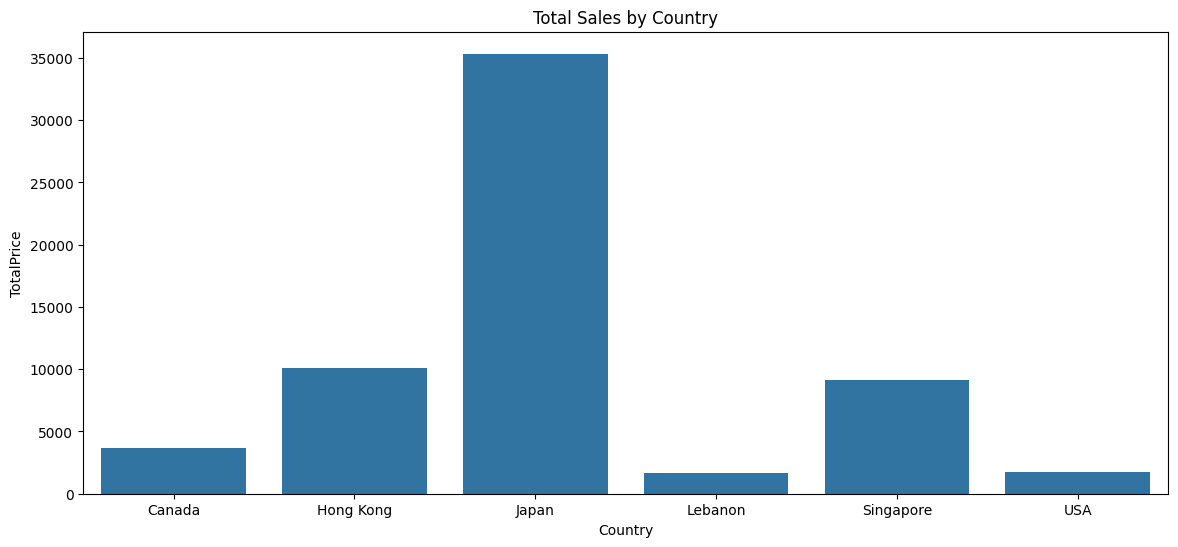

In [19]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Country', y='TotalPrice', data=country_sales)
plt.title('Total Sales by Country')
plt.show()

In [20]:
country_mean_sales = filtered_df.groupby('Country')['TotalPrice'].mean().reset_index()
overall_mean_sales = df['TotalPrice'].mean()

print("6개 국가의 평균 판매금액:")
print(country_mean_sales)
print('------------------')
print("모든 국가의 평균 판매금액:")
print(overall_mean_sales)

6개 국가의 평균 판매금액:
     Country  TotalPrice
0     Canada   24.280662
1  Hong Kong   35.128611
2      Japan   98.716816
3    Lebanon   37.641778
4  Singapore   39.827031
5        USA    5.948179
------------------
모든 국가의 평균 판매금액:
17.98779487699964


- 모든 국가의 총 판매금액에서 6개 국가의 판매금액 비중은 매우 낮습니다
- 하지만, 6개 국가에서 관찰된 평균 판매금액은 (미국을 제외하고) 모든 국가의 평균 판매금액보다 높습니다.
- 따라서, 전체 데이터셋에서의 추세와 6개 국가에서의 추세가 상반된다는 것을 볼 수 있습니다
- 일본과 홍콩 등에서 높은 평균 판매금액을 보이고 있으므로, 해당 국가에서는 프리미엄 제품 마케팅을 강화할 수 있습니다
- 전체 판매금액에서 차지하는 비중이 낮지만, 특정 국가에서 높은 평균 판매금액을 기록하는 제품 라인업을 강화할 수 있습니다
- 캐나다와 미국 등에서는 상대적으로 낮은 평균 판매금액을 보이므로, 이들 국가에서는 저가 제품 마케팅을 강화할 수 있습니다

## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
# 전처리
df = df.dropna(subset=["Quantity", "UnitPrice", "TotalPrice"])
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0) & (df["TotalPrice"] > 0)]

In [23]:
X = df[["UnitPrice"]]
y = df["TotalPrice"]

In [24]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

coef = model.coef_[0]
intercept = model.intercept_

r2 = r2_score(y, y_pred)

print(f"회귀계수 (Coefficient): {coef}")
print(f"절편 (Intercept): {intercept}")
print(f"결정계수 (R-squared): {r2}")

회귀계수 (Coefficient): 1.0343106135145161
절편 (Intercept): 16.08017318490481
결정계수 (R-squared): 0.01887972932483417


In [25]:
print(f"회귀계수: {coef} - 이는 단가(UnitPrice)가 1 단위 증가할 때 총 판매액(TotalPrice)이 평균적으로 {coef}만큼 증가함을 의미합니다.")
print(f"절편: {intercept} - 이는 단가(UnitPrice)가 0일 때의 예상 총 판매액(TotalPrice)을 의미합니다.")
print(f"결정계수: {r2} - 이는 모델이 총 판매액(TotalPrice)의 변동을 설명하는 정도를 나타내며, 1에 가까울수록 더 좋은 적합도를 의미합니다.")

회귀계수: 1.0343106135145161 - 이는 단가(UnitPrice)가 1 단위 증가할 때 총 판매액(TotalPrice)이 평균적으로 1.0343106135145161만큼 증가함을 의미합니다.
절편: 16.08017318490481 - 이는 단가(UnitPrice)가 0일 때의 예상 총 판매액(TotalPrice)을 의미합니다.
결정계수: 0.01887972932483417 - 이는 모델이 총 판매액(TotalPrice)의 변동을 설명하는 정도를 나타내며, 1에 가까울수록 더 좋은 적합도를 의미합니다.


## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [26]:
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [27]:
df_promotion.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중,False,False


In [28]:
# 증거의 사다리 평가 함수
def evaluate_evidence(p_value):
    if p_value < 0.01:
        return "매우 강한 증거"
    elif p_value < 0.05:
        return "강한 증거"
    elif p_value < 0.1:
        return "일정한 증거"
    else:
        return "약한 증거"

In [29]:
# 크리스마스 기간 동안 비교
christmas_period = df_promotion[df_promotion["IsChristmasPeriod"]]
christmas_products_christmas_period = christmas_period[christmas_period["IsChristmasProduct"]]
non_christmas_products_christmas_period = christmas_period[~christmas_period["IsChristmasProduct"]]

In [30]:
# 크리스마스 기간 동안 판매 차이 분석
mean_christmas_products_christmas_period = christmas_products_christmas_period["TotalPrice"].mean()
mean_non_christmas_products_christmas_period = non_christmas_products_christmas_period["TotalPrice"].mean()

print(f'크리스마스기간-크리스마스상품-평균판매: {mean_christmas_products_christmas_period}')
print(f'크리스마스기간-크리스마스 비상품-평균판매: {mean_non_christmas_products_christmas_period}')

크리스마스기간-크리스마스상품-평균판매: 13.696774193548388
크리스마스기간-크리스마스 비상품-평균판매: 24.80349931787176


In [31]:
# 크리스마스 기간 t-검정
t_stat_christmas_period, p_value_christmas_period = ttest_ind(christmas_products_christmas_period["TotalPrice"], non_christmas_products_christmas_period["TotalPrice"], equal_var=False)
print(f"T-statistic: {t_stat_christmas_period}")
print(f"P-value: {p_value_christmas_period}")

T-statistic: -3.5779138281386973
P-value: 0.0006355133252501859


In [32]:
# 크리스마스 기간 증거의 강도
print(evaluate_evidence(p_value_christmas_period))

매우 강한 증거


In [33]:
# 크리스마스가 아닌 기간 동안의 비교
non_christmas_period = df_promotion[~df_promotion["IsChristmasPeriod"]]
christmas_products_non_christmas_period = non_christmas_period[non_christmas_period["IsChristmasProduct"]]
non_christmas_products_non_christmas_period = non_christmas_period[~non_christmas_period["IsChristmasProduct"]]


In [34]:
# 크리스마스가 아닌 기간 동안 판매 차이 분석
mean_christmas_products_non_christmas_period = christmas_products_non_christmas_period["TotalPrice"].mean()
mean_non_christmas_products_non_christmas_period = non_christmas_products_non_christmas_period["TotalPrice"].mean()

print(f'크리스마스가 아닌 기간-크리스마스상품-평균판매: {mean_christmas_products_non_christmas_period}')
print(f'크리스마스가 아닌 기간-크리스마스 비상품-평균판매: {mean_non_christmas_products_non_christmas_period}')

크리스마스가 아닌 기간-크리스마스상품-평균판매: 15.216978557504873
크리스마스가 아닌 기간-크리스마스 비상품-평균판매: 21.999717906030334


In [35]:
# 크리스마스가 아닌 기간 t-검정
t_stat_non_christmas_period, p_value_non_christmas_period = ttest_ind(christmas_products_non_christmas_period["TotalPrice"], non_christmas_products_non_christmas_period["TotalPrice"], equal_var=False)
print(f"T-statistic: {t_stat_non_christmas_period}")
print(f"P-value: {p_value_non_christmas_period}")

T-statistic: -7.780686370057457
P-value: 8.958728824863028e-15


In [36]:
# 크리스마스가 아닌 기간 증거의 강도
print(evaluate_evidence(p_value_non_christmas_period))

매우 강한 증거


- 주어진 분석 결과에서 크리스마스 기간과 크리스마스가 아닌 기간 모두에서 크리스마스와 관련 없는 상품이 더 많이 팔리는 상황에 맞춰, 효과적인 프로모션 전략, 재고 및 공급망 관리, 상품 다양화 전략을 다음과 같이 제안

#### 1. 프로모션 전략
- (크리스마스 기간) 주요 상품에 집중한 프로모션. 크리스마스 시즌에 일상용품, 가전제품, 의류에 대한 특별 할인 행사나 패키지 제공하고, 크리스마스 관련 상품과 크리스마스와 관련없는 상품을 묶어 패키지로 판매하는 크로스 프로모션 실시
- (크리스마스가 아닌 기간) 크리스마스와 관련없는 상품의 판매를 촉진하기 위해 정기적인 할인 이벤트나 프로모션을 진행하고 고객의 구매 패턴을 분석하여 특정 고객 세스먼트에 맞춘 타겟 마케팅 캠페인 실시

#### 2. 재고 및 공급망 관리
- (크리스마스 기간) 크리스마스 시즌 동안 더 많이 팔리는 크리스마스와 관련 없는 상품에 대한 수요 예측을 강화하고, 이에 맞춰 재고를 최적화하고, 크리스마스 시즌에 맞춰 공급망을 효율적으로 조정하여 인기 상품의 공급을 원활하게 유지합니다
- (크리스마가 아닌 기간) 크리스마스와 관련 없는 상품의 재고 회전율을 높이기 위해 지속적으로 재고를 모니터링하고, 적절한 재고 수준을 유지하고, 연중 수요 변화에 맞춰 공급망을 최적화하여 비용을 최소화하고, 재고 비용을 줄입니다

#### 3. 상품 다양화 전략
- (크리스마스 기간) 크리스마스와 관련 없는 상품의 인기가 높기 때문에, 가정용품, 패션, 가전제품 등 다양한 카테고리의 상품을 확보하고, 이를 적극적으로 마케팅하며, 최신 트렌드와 고객 선호도를 반영한 상품을 도입합니다
- (크리스마스가 아닌 기간) 계절이나 이벤트에 맞춘 다양한 상품 포트폴리오를 구성하여, 연중 내내 고객의 관심을 끌도록하며, 고객의 피드백과 구매 데이터를 기반으로 상품 라인업을 지속적으로 개선합니다


## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [37]:
from statsmodels.formula.api import ols

In [38]:
model = ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + Country', data=df_promotion).fit()

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          5.46e-138
Time:                        08:03:39   Log-Likelihood:            -1.3687e+05
No. Observations:               26157   AIC:                         2.738e+05
Df Residuals:                   26133   BIC:                         2.740e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### 회귀계수(coef) 해석
- 절편 (Intercept): 모든 독립 변수의 값이 0일 때의 예상 판매량은 16.8705입니다
- 크리스마스 관련 상품 여부 (IsChristmasProduct): 해당 상품이 크리스마스 관련 상품일때 판매량이 평균적으로 0.7779 감소합니다. 그러나 p-값이 0.507로 높아 통계적으로 유의미하지 않습니다
- 단가 (UnitPrice): 단가가 1 단위 증가할 때 판매량이 평균적으로 0.5510 감소합니다. 이는 p-값이 0.000으로 매우 유의미합니다.
- 특정 국가의 회귀계수는 해당 국가에서의 판매량이 다른 국가에 비해 얼마나 증가하거나 감소하는지를 나타냅니다
- 예를 들어, Finland: 58.5934, Japan: 47.1576, Netherlands: 78.9641, Sweden: 136.1033는 유의미한 양의 계수를 가지고 있으며, 이는 이 국가들에서 판매량이 다른 국가에 비해 더 높다는 것을 의미합니다
- 대부분의 다른 국가들은 통계적으로 유의미하지 않은 계수를 가지고 있습니다

#### 모델 성능
- 결정계수 (R-squared): 모델이 종속 변수(판매량)의 변동을 2.7%만 설명한다는 것을 의미합니다. 이는 모델이 비교적 낮은 설명력을 가지고 있음을 나타냅니다
- F-statistic: 31.87, Prob (F-statistic): 5.46e-138은 모델 전체가 통계적으로 유의미함을 나타냅니다

### [크리스마스 시즌 판매 전략 분석 보고서]

#### 1.분석 과정
- 데이터 수집 및 전처리 수행
- statsmodels 라이브러리의 ols(Ordinary Least Squares) 함수를 사용하여 다변량 선형 회귀모델을 구축
- 모델의 적합성을 평가하고, 각 변수의 회귀 계수를 해석

#### 2.분석 결과
- 모델이 종속 변수(판매량)의 변동을 2.7%만 설명하여 비교적 낮은 설명력을 보였습니다
- 모델 전체가 통계적으로 유의미함을 나타냅니다.
- 회귀 계수 해석은 상기 부분 참조

#### 3.권장 사항
- 크리스마스 관련 상품의 판매량을 증진시키기 위해 특별 프로모션을 강화할 필요가 있습니다
- 단가가 높은 상품의 판매량을 증가시키기 위해 할인 행사나 패키지 판매를 고려할 필요가 있습니다
- 판매량이 높은 국가들(예: 핀란드, 일본, 네덜란드, 스웨덴)에서는 재고를 충분히 확보하고 빠른 공급망 관리를 통해 수요를 충족시킬 필요가 있습니다
- 판매량이 낮은 국가들에서는 재고를 적절히 조절하여 불필요한 재고 비용을 줄일 필요가 있습니다
- 크리스마스 관련 상품과 비관련 상품을 함께 묶어 판매하는 크로스 프로모션을 통해 판매량을 증대시킬 필요가 있습니다

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [41]:
df['IsPurchased'] = df['Description'].str.contains('WHITE HANGING HEART T-LIGHT HOLDER').astype(int)

In [42]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd,IsPurchased
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,0


In [43]:
features = ['UnitPrice', 'Quantity', 'CustomerID', 'Country']
df_features = df[features + ['IsPurchased']].dropna(subset=features)
df_features = pd.get_dummies(df_features, columns=['Country'])

In [44]:
X = df_features.drop('IsPurchased', axis=1)
y = df_features['IsPurchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9948980232981892
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     79171
           1       0.00      0.00      0.00       406

    accuracy                           0.99     79577
   macro avg       0.50      0.50      0.50     79577
weighted avg       0.99      0.99      0.99     79577



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 모델의 전체 정확도는 약 99.49%로 매우 높습니다. 이는 테스트 세트에서 모델이 약 99.49%의 경우에 정확하게 예측했다는 것을 의미합니다
- (Class 0, 미구매) Precision은 0.99로 모델이 미구매로 예측한 샘플 중 99%가 실제로 미구매입니다. Precision과 Recall의 조화 평균인 F1-Score는 1.00으로 Class 0에서 모델의 성능이 매우 우수함을 나타냅니다.
- (Class 1, 구매) Precision은 0.00로 모델이 구매로 예측한 샘플 중 정확한 예측이 없습니다
- (support) 각 클래스의 샘플수를 보면 Class 0은 79171, Class 1은 406으로 데이터가 불균형합니다
- (macro avg) 모델이 클래스 1을 거의 예측하지 못했기 때문에, 모든 지표가 0.50으로 낮게 나타납니다
- (Weighted Avg) 모델이 대부분의 경우를 정확하게 예측했기 때문에, 전체 지표가 높게 나타납니다

- (문제점) 모델이 Class 1(구매)을 거의 예측하지 못했습니다. 이는 데이터셋의 불균형 때문일 가능성이 큽니다. Class 0(미구매)의 샘플이 압도적으로 많아 모델이 Class 1을 학습하는 데 어려움을 겪었을 수 있습니다
- (해결책) 오버샘플링 또는 언더샘플링

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [48]:
# SMOTE를 사용한 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
y_pred = model.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9872681457342605
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     79214
           1       0.98      0.99      0.99     79129

    accuracy                           0.99    158343
   macro avg       0.99      0.99      0.99    158343
weighted avg       0.99      0.99      0.99    158343

